Name: Kevin Zhang

## COMP4220: Machine Learning, Fall 2020, Assignment 3


Due: Monday, October 19, 10pm

Please submit one pdf file for all questions.

****When turning in assignments after the due date, please clearly specify the number of late hours used.

P1: What are precision and recall?

Precision is defined as the accuracy of the positive predictions. It is meant to be a more concise metric when the confusion matrix may be too complex. The higher the number of true positives, the higher the precision value will be. Recall is defined as the ratio of positive instances that are detected correctly by the classifier. It is also known as the true positive rate. Recall is used in case the precision value is not useful like in case it has only one positive instance.










P2: Explain the use of ROC curves and the AUC of an ROC Curve.

ROC curve is used to plot the true positive rate against the false positive rate. It is meant to plot sensitivity against 1-specificity. The higher the recall, the more false positives the classifier will generate. The ROC curve is similar to the PR curve, except that the ROC curve is preferred when the positive class is more common or when you care more about the false negatives. AUC of a ROC curve is basically the area below the ROC curve. It is used as one way to compare classifiers, where a perfect classifier will have an AUC equal to one, while a random classifier will have a AUC equal to 0.5.












P3: Programming assignment(Logistic Regression)

This example uses two feature of the Social_Network_Ads dataset that is uploaded along with this Jupyter notebook.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
import io
from google.colab import files
uploaded = files.upload()
dataset=pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))
#dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[1, 3].values
y = dataset.iloc[:, 4].values


Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [ ]:
# P3.1: Split the dataset into the Training set(%75) and Test set(%25) using "train_test_split" from sklearn.model_selection.

# Use these variables:(X_train, X_test, y_train, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25)



NameError: ignored

The implementation of logistic regression you use has a penalty on coefficent size (L1 or L2 norm). In this case, feature scaling matters, because coeffitients of features with large variance are small and thus less penalized.

In [ ]:
# p3.2: Apply Feature Scaling method for X_train and X_test with "StandardScaler" from "sklearn.preprocessing"

# Hint: use StandardScaler.fit_transform(X_train) for "X_train" and use StandardScaler.transform(X_test) for "X_test"
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform (X_test)

In [ ]:
#p3.3: Train the logistic Regression model on the Training set,  #(random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#p3.4: Predict the Test set results 
y_pred = classifier.predict(X_test)


In [ ]:
#p3.5: Make the Confusion Matrix and show the result
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm



array([[59,  9],
       [10, 22]])

How do you decide which threshold to use? First, use the cross_val_predict()function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,method="decision_function")

In [ ]:
#Logistic Regression Classification metrics
#p3.6: Compute the accuracy, precision, recall and f1_score and show all results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_train, y_scores.round()))
print(precision_score(y_train, y_scores.round(), average='micro'))
print(recall_score(y_train, y_scores.round(), average='micro'))
print(f1_score(y_train, y_scores.round(), average='micro'))








0.11666666666666667
0.11666666666666667
0.11666666666666667
0.11666666666666667


In [ ]:
#p3.7: use the precision_recall_curve() function to compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

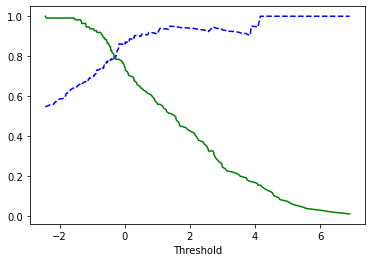

In [ ]:
#p3.8:Use Matplotlib to plot precision and recall as functions of the threshold value
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.show()





















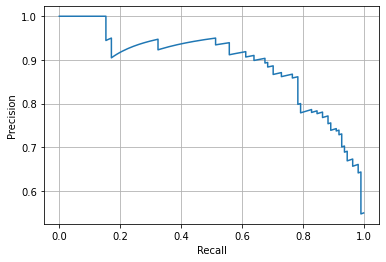

In [ ]:
#p3.9: Visualise the Plot precision_vs_recall plot
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()










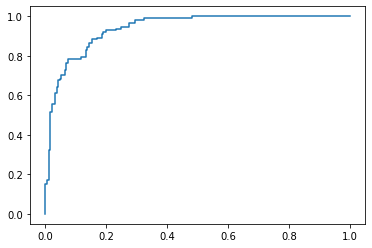

In [ ]:
#p3.10:plot the ROC curve
#you should first use the roc_curve() function to compute the TPR and FPR for various threshold values:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr)
plt.show()
















In [ ]:
#p3.11: Compute AUC score and show the result
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)







0.9392726059392726

# Please see the plots below
****Just provided for training purpose

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


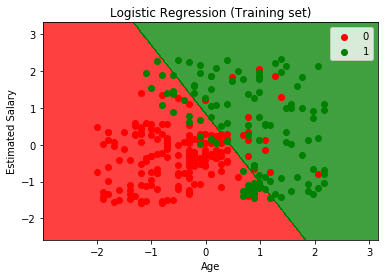

In [ ]:
#Visualise the Training set results of Logistic Regression method

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


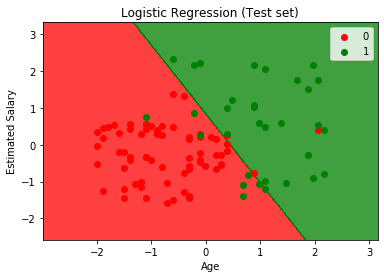

In [ ]:
#Visualise the Training set results of Logistic Regression method

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()